<a href="https://colab.research.google.com/github/IssabellaZ/MA3K7/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

# adjust the N value here
N = 2024

# adjust the iteration time here
t = 10000

# empty list to store all last numbers
all = []

def hat_game():
  l = list(range(1,N+1))

  # create a copy of the list
  d = l.copy()

  while len(d)>1:
    # randomly choose two element from the list
    x,y = random.sample(d, k=2)

    # remove the two element drawn
    d.remove(x)
    d.remove(y)

    # add the new number to the list
    d.append(abs(x-y))

  return d


# store the last numbers to a list
for _ in range(t):
  res = hat_game()
  all+=res

all.sort()
print("All:",all)

In [ ]:
unique_result = set(all)
print("Unique last numbers:",unique_result)

all_even_numbers = range(0,N+1,2)
print("Not appeared numbers: ",set(all_even_numbers)-unique_result)

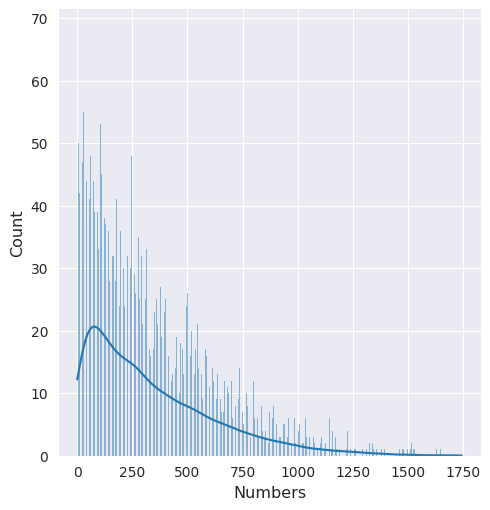

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# set style
sns.set_style("darkgrid")

# distribution plot
plot = sns.displot(all, kde=True,discrete=True, binwidth=1)

# label axis
plt.ylabel("Count",fontsize=11.5)
plt.xlabel('Numbers',fontsize=11.5)
plt.show()

In [ ]:
from collections import Counter

# Count frequency of each number
count_dict = Counter(all)

# Find the mode and count
mode = max(count_dict, key=count_dict.get)
mode_count = count_dict[mode]

print("Mode:", mode)
print("Frequency:", mode_count)

In [5]:
import numpy as np
import scipy.stats as stats

# list of distributions
dist_names = ['norm','skewnorm','expon', 'gamma', 'poisson', 'chi2']

results = {}

for dist in dist_names:
    # get distribution class
    dist_class = getattr(stats, dist)

    # fit distribution to data
    if dist == 'poisson':  # discrete Poisson distribution
        mu = np.mean(all)
        params = (mu,) # set parameter
    else:  # continuous distributions
        params = dist_class.fit(all) # get parameter

    # perform goodness-of-fit test
    kstest_statistic, kstest_pvalue = stats.kstest(all, dist, args=params)

    results[dist] = (kstest_statistic, kstest_pvalue)

for dist, (statistic, pvalue) in results.items(): # retrieve value from dictionary
    print("Distribution: ", dist ,"KS statistic: ",statistic, "p-value: ",pvalue)


Distribution:  norm KS statistic:  0.12429958954582088 p-value:  4.007790096552722e-135
Distribution:  skewnorm KS statistic:  0.07021295578706926 p-value:  2.5964305215097705e-43
Distribution:  expon KS statistic:  0.04066134499849278 p-value:  8.385282152954844e-15
Distribution:  gamma KS statistic:  0.026457742502126846 p-value:  1.630530276614375e-06
Distribution:  poisson KS statistic:  0.5446449395878571 p-value:  0.0
Distribution:  chi2 KS statistic:  0.026457643704902445 p-value:  1.6307009270541453e-06
